<a href="https://colab.research.google.com/github/WajeehGillani/learning-agents/blob/main/my_forth_lang_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 9.7 MB/s eta 0:00:00


In [8]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, List, Dict, Any

In [5]:
class AgentState(TypedDict):
    num1: int
    num2: int
    operator1: str
    finalNumb: int
    num3: int
    num4: int
    operator2: str
    finalNum2: int




In [9]:
def addition_node(state: AgentState) -> str:
   """ This is node is just for adding """
   state['finalNumb'] = f"{state['num1'] + state['num2']} "
   return state

In [14]:
def subtract_node(state: AgentState) -> str:
   """ This is node is just to substract """
   state['finalNumb'] = f"{state['num1'] - state['num2']} "
   return state

In [15]:
def decide_node(state: AgentState) -> str:
   """ This is node is just to decide what edge node need to use next """
   if(state['operator1'] == '+'):
     return 'additional_edge'
   if(state['operator1'] == '-'):
     return 'subtraction_edge'
   else:
      return "invalid operation"

In [19]:
graph = StateGraph(AgentState)

graph.add_node("addition_node",addition_node)
graph.add_node("subtract_node",subtract_node)
graph.add_node("Router",lambda state:state)
graph.add_conditional_edges(
    "Router",
    decide_node,
    {
        "additional_edge": "addition_node",
        "subtraction_edge": "subtract_node",
    }
)
graph.add_edge(START,"Router")
graph.add_edge("subtract_node", END)
graph.add_edge("addition_node", END)

app=graph.compile()

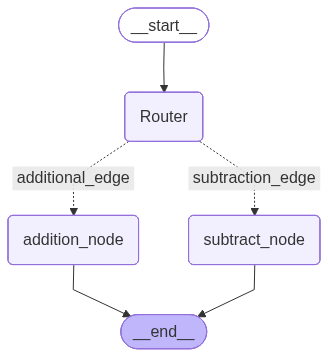

In [20]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [26]:
init_state = AgentState(num1=10,num2=22,operator1='-')
print(app.invoke(init_state))

{'num1': 10, 'num2': 22, 'operator1': '-', 'finalNumb': '-12 '}
